In [1]:
import gensim
import gensim.corpora as corpora
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from gensim.models import CoherenceModel
from gensim.utils import simple_preprocess
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle
from nltk.corpus import stopwords
#use wordnet lemmatizor, gensims lemmatizer is deactivated
from nltk.stem import WordNetLemmatizer
import pyLDAvis

In [2]:
from gensim import corpora
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

In [3]:
#Need to add nltk stop_words
stop_words = set(stopwords.words('english'))

In [4]:
#read in file
with open('../data/data_simple_preprocess/cf_kv_tokenized_simple_preprocess_sw_removed.txt', 'rb') as file:
    cf_kv_tokenized_simple_preprocess_sw_removed = pickle.load(file)

In [8]:
print(len(cf_kv_tokenized_simple_preprocess_sw_removed.keys()))

43


In [6]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(cf_kv_tokenized_simple_preprocess_sw_removed.values(), min_count=5, threshold=50) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[cf_kv_tokenized_simple_preprocess_sw_removed.values()], threshold=50)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[list(cf_kv_tokenized_simple_preprocess_sw_removed.values())[0]]])


['address', 'tatian', 'greeks', 'chapter', 'the', 'greeks', 'claim', 'without', 'reason', 'invention', 'arts', 'be', 'not', 'greeks', 'hostilely', 'disposed', 'barbarians', 'look', 'ill', 'opinions', 'for', 'institutions', 'derived', 'barbarians', 'the', 'eminent', 'telmessians', 'invented', 'art', 'divining', 'dreams', 'carians', 'prognosticating', 'stars', 'phrygians', 'ancient', 'isaurians', 'augury', 'flight', 'birds', 'cyprians', 'art', 'inspecting', 'victims', 'to', 'babylonians', 'owe', 'astronomy', 'persians', 'magic', 'egyptians', 'geometry', 'phoenicians', 'instruction', 'alphabetic', 'writing', 'cease', 'then', 'miscall', 'imitations', 'inventions', 'own', 'orpheus', 'again', 'taught', 'poetry', 'song', 'him', 'too', 'learned', 'mysteries', 'the', 'tuscans', 'taught', 'plastic', 'art', 'annals', 'egyptians', 'learned', 'write', 'history', 'acquired', 'art', 'playing', 'flute', 'marsyas', 'olympus', 'these', 'rustic', 'phrygians', 'constructed', 'harmony', 'shepherd', 'pipe',

In [11]:

# Create Dictionary
id2word = corpora.Dictionary(cf_kv_tokenized_simple_preprocess_sw_removed.values())

In [12]:
# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in cf_kv_tokenized_simple_preprocess_sw_removed.values()]

In [13]:

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=6, 
                                            random_state=42,
                                            update_every=1,
                                            chunksize=10,
                                            passes=10,
                                            alpha='symmetric',
                                            iterations=100,
                                            per_word_topics=True)


In [14]:
print(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0, '0.017*"god" + 0.011*"he" + 0.009*"and" + 0.009*"things" + 0.008*"the" + 0.007*"for" + 0.006*"his" + 0.006*"him" + 0.006*"but" + 0.005*"man"'), (1, '0.000*"god" + 0.000*"pompeianus" + 0.000*"granianus" + 0.000*"bidentalis" + 0.000*"battalion" + 0.000*"certifies" + 0.000*"cohorts" + 0.000*"nyss" + 0.000*"antonin" + 0.000*"complement"'), (2, '0.019*"ye" + 0.017*"literally" + 0.016*"christ" + 0.015*"jesus" + 0.011*"love" + 0.011*"bishop" + 0.007*"let" + 0.007*"comp" + 0.007*"chapter" + 0.007*"worthy"'), (3, '0.001*"superfluities" + 0.001*"finery" + 0.000*"courtesans" + 0.000*"revelry" + 0.000*"thersites" + 0.000*"colts" + 0.000*"instructor" + 0.000*"amatory" + 0.000*"feminino" + 0.000*"crazy"'), (4, '0.011*"for" + 0.010*"and" + 0.009*"god" + 0.008*"he" + 0.008*"the" + 0.006*"but" + 0.006*"says" + 0.005*"man" + 0.005*"lord" + 0.004*"good"'), (5, '0.020*"god" + 0.015*"and" + 0.014*"he" + 0.012*"lord" + 0.011*"shall" + 0.010*"the" + 0.009*"him" + 0.009*"said" + 0.009*"his" + 0.009*"for"

In [17]:
print(type(id2word))
print(type(corpus))
print(type(lda_model))

<class 'gensim.corpora.dictionary.Dictionary'>
<class 'list'>
<class 'gensim.models.ldamodel.LdaModel'>


In [18]:
with open('../pngs/id2word.Dictionary', 'wb') as file:
    pickle.dump(id2word, file)
    
with open('../pngs/corpus.list', 'wb') as file:
    pickle.dump(corpus, file)
    
with open('../pngs/lda_model.LdaModel', 'wb') as file:
    pickle.dump(lda_model, file)

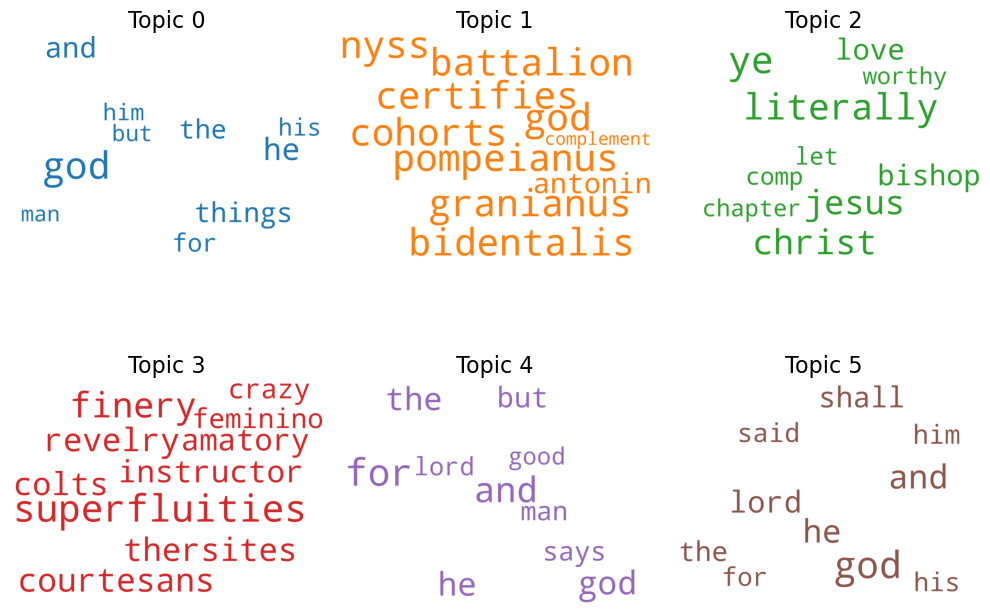

In [19]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 3, figsize=(10,8), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [20]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, id2word, mds='mmds')
pyLDAvis.display(vis)

C:\Users\micha\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


In [21]:
pyLDAvis.save_html(lda_model, ‘lda.html’)

SyntaxError: invalid character '‘' (U+2018) (1148648068.py, line 1)